# Discussion 4: Logistic Regression with digits data and model performance

# 1. View the digits data

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
# 1797 images, 8 by 8 for dimensionality 64  
imgdata = digits.data.shape
# 1797 labels from integer 0-9 
labeldata = digits.target.shape
print("Image Data Shape", imgdata)
print("Label Data Shape", labeldata)
print("Example image \n", digits.data[0:5])
print("Example label \n", digits.target[0:20])

Image Data Shape (1797, 64)
Label Data Shape (1797,)
Example image 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0. 

# 2. Show the images and labels

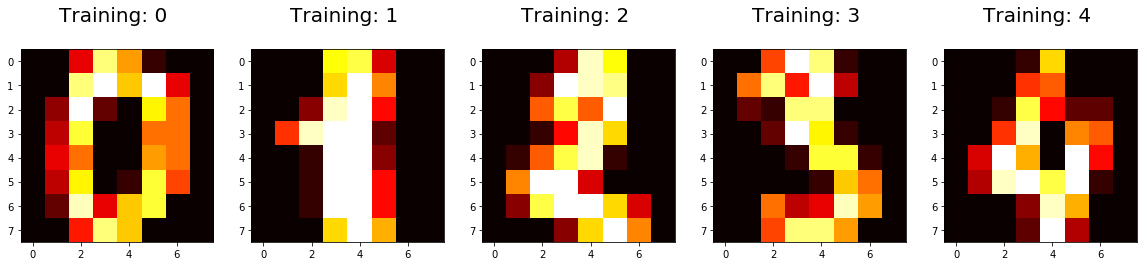

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

# zip 5 digits data and 5 labels first
# index (enumerate) to plot 5 pictures altogether

for plotindex, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    # image is one row with dimensonality 64 
    # label is one label between 0-9
    plt.subplot(1, 5, plotindex + 1)
    
    # reshape image 64 to 8 x 8
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.hot) # can also use plt.cm.gray
    
    # title with index
    plt.title('Training: %i \n' % label, fontsize = 20)
plt.show()

# 3. Split to train/test data

In [5]:
from sklearn import utils

# scale image to 255 and avoid computation errors
img = digits.data / 255.0

Ntotal = len(digits.target)
Ntrain = int(Ntotal * 0.8)
Ntest = Ntotal-Ntrain

x_shuffled, y_shuffled = utils.shuffle(img, digits.target) #Shuffles X and y arrays in unison
# Split predictors into train/test
xtrain = x_shuffled[:Ntrain]
xtest = x_shuffled[Ntrain:]
# Split the targets into train/test
ytrain = y_shuffled[:Ntrain]
ytest = y_shuffled[Ntrain:]

In [8]:
## Can also use package from sklearn to split train/test data
#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(img, digits.target, test_size=0.2, random_state=0)

# 4. Modeling pattern with Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xtrain, ytrain)
predictions = LR.predict(xtest)
score = LR.score(xtest, ytest)
score

0.8805555555555555

## Modeling pattern with penalty "L1" Logistic Regression

In [10]:
# penalty "l1" lasso regression, default is "l2"
# solver can be "saga" or "liblinear" for lasso
# max_iter should over 100 to converge the data
LRlasso = LogisticRegression(penalty = "l1", solver = "saga", max_iter = 1000)
LRlasso.fit(xtrain, ytrain)
lassopredictions = LRlasso.predict(xtest)
lassoscore = LRlasso.score(xtest, ytest)
lassoscore

0.8888888888888888

# 5. Confusion Matrix for Logistic Regression (LR)

### Only plot the simple confusion matrix

In [11]:
from sklearn import metrics
cm = metrics.confusion_matrix(ytest, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 27  1  0  0  0  0  0  1  3]
 [ 0  1 35  1  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  2  0  0]
 [ 0  0  0  0 32  0  0  1  1  0]
 [ 0  0  0  0  1 33  1  0  0  5]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  1  0 39  0  0]
 [ 0  8  0  1  0  1  2  0 19  4]
 [ 0  1  0  0  3  1  0  2  1 26]]


### Write the classification report with precision , recall and F1-score

In [12]:
from sklearn.metrics import classification_report

# TP = True Positive 
# FP = False Positive
# TN = True Negative
# FN = False Negative

# Precision, TP / (TP + FP)
# Recall, TP/ (TP + TN)
# Accuracy, (TP + TN) / (TP + TN + FP + FN)
# F1-score, 2 * Precision * Recall / (Precision + Recall)

print(classification_report(ytest, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.73      0.84      0.78        32
           2       0.97      0.95      0.96        37
           3       0.94      0.94      0.94        33
           4       0.89      0.94      0.91        34
           5       0.92      0.82      0.87        40
           6       0.93      1.00      0.96        38
           7       0.89      0.97      0.93        40
           8       0.86      0.54      0.67        35
           9       0.68      0.76      0.72        34

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.87       360
weighted avg       0.88      0.88      0.88       360



# 6. See the misclassifed digits 

In [13]:
# set the index to be 0 at first
index = 0
misclassified = []
for index, (label, predict) in enumerate(zip(ytest, predictions)):
    if label != predict: 
        misclassified.append(index)
        index = index + 1

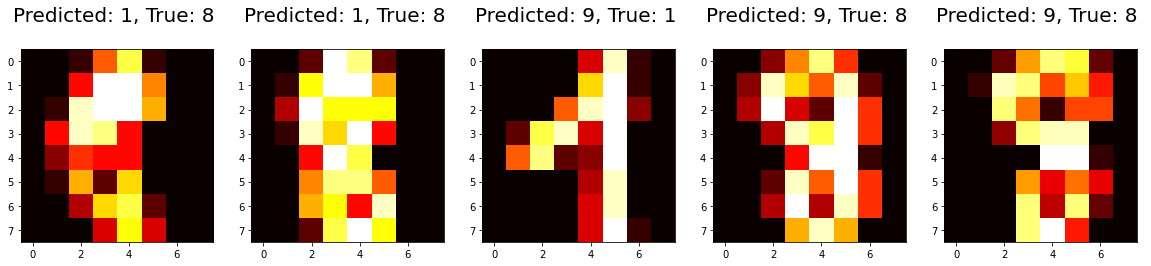

In [14]:
plt.figure(figsize=(20,4))

for plotindex, badindex in enumerate(misclassified[0:5]):
    # draw the false prediction plots altogether
    # plot index will be [0:5] 
    # badindex will be the wrong predicted value index
    
    plt.subplot(1, 5, plotindex + 1)
    # xtest is the pixels test data 
    # reshape 64 to 8 x 8 
    plt.imshow(np.reshape(xtest[badindex], (8,8)), cmap=plt.cm.hot) # can also use plt.cm.gray
    # plot title with values
    plt.title("Predicted: {}, True: {} \n".format(predictions[badindex], ytest[badindex]), fontsize = 20)
